# Linear regression model for the sale price of homes¶

The definitions from  follow:
Square footage: the area of a house
Waterfront footage: Max value 570 
Building grade: Represents the construction quality of improvements. Grades run from grade 3 to 13 in our data. (here)[https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r]
-Does higher square footage increases home sale price?
Yes, we dermined that the square footage of a home is directly correlated with the saleprice.
-Does having a porch increases home sale price?
We can't say! From our model, the porch size was moderatly correlated with the size of the home (or, the square footage of the home). In other words, one is dependent on the other so we could not use this as a predictor in the model.
-Having a beachfront or lakefront increases home sale price
_____
Citations
Gomez, J. 2019. "8 critical factors that influence a home's value". OpenDoor. Available at: https://www.opendoor.com/w/blog/factors-that-influence-home-value
Buczynski, B. 2019. "5 Proven Ways to Increase Home Value". NerdWallet. Available at: https://www.nerdwallet.com/blog/mortgages/how-to-increase-home-value/
Taylor, A.B. 2019. "11 Features That Will Sell Your Home Faster". Kiplinger. Available at: https://www.kiplinger.com/slideshow/real-estate/T010-S001-home-features-today-s-buyers-want-most/index.html
Crow, S. 2019. "50 Clever Ways to Instantly Add Value to Your Home". BestLife. Available at: https://bestlifeonline.com/home-value-upgrades/
Unknown author. 2018. "5 Features That Make A Property Valuable". House Flipping School. Available at: https://houseflippingschool.com/5-features-valuable/

## Purpose
Many factors influence the saleprice of homes. According to research (cited below) square footage, porches, and waterfront property increases a home's sale price. 

**We created a model of the saleprice of a house by using three predictors - square footage, waterfront footage,'and the grade of a building.

## Assumptions
Drop the data which sale price less than 50,000 USD.

## Issues

## Analysis Method

## Conclusion

In [1]:
import sqlalchemy
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
from sqlalchemy import create_engine
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

Load all the [data](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) from three tables:
- Real Property Sales 
- Residential Building 
- Parcel 


### Create POSTGRES SQL engine and query from housing_prices database.

We use POSTGRES SQL engine to query residential house price.

In [2]:
df = pd.read_csv("../data/processed/residential_prices.csv", low_memory=False)

### Use OneHotEncoder to encode categorical features as a one-hot numeric array.

In [3]:
df_feature = df[['wfntlocation']]
onehotencoder = OneHotEncoder(categorical_features = [0])
data_str_ohe=onehotencoder.fit_transform(df_feature).toarray()
df_water = pd.DataFrame(data_str_ohe)
df = pd.concat([df, df_water],axis=1)
df.rename(columns={0:"wfntlocation_0", 1:"wfntlocation_3", 2:"wfntlocation_5", 
                   3:"wfntlocation_6", 4:"wfntlocation_7", 5:"wfntlocation_8", 6:"wfntlocation_9"}, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


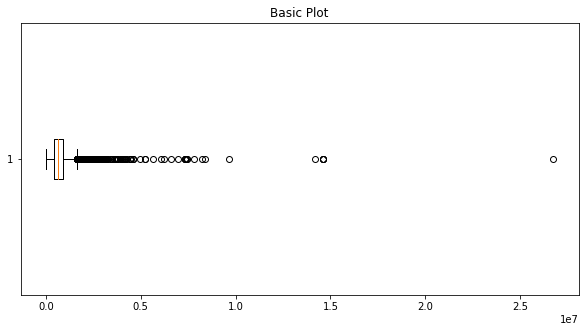

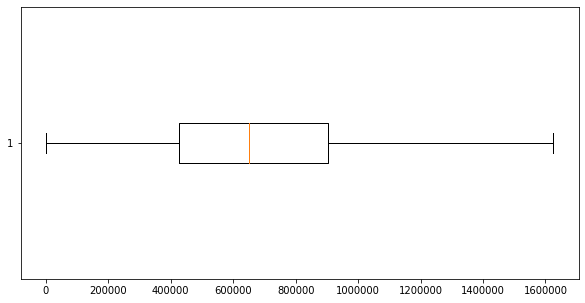

In [6]:
#create a boxplot of saleprice to see outliers
#outliers above 1.6 million

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title('Basic Plot')
ax1.boxplot(df['saleprice'], vert=False);
fig2, ax2 = plt.subplots(figsize=(10,5))
ax2.boxplot(df['saleprice'], vert=False, showfliers=False);

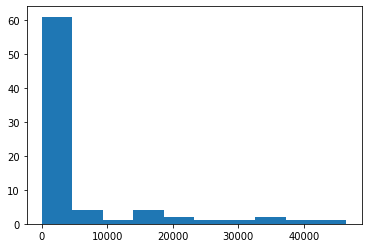

In [7]:
plt.hist(df[df['saleprice']<50000]['saleprice'], bins =10);

Calculate the age of the house and check is there porch.
Also, drop the data which sale price less than 50,000 USD.

In [8]:
df['age'] = 2019 - df['yrbuilt']
df['porch'] = np.where(((df['sqftopenporch']>0) | (df['sqftenclosedporch']>0)) , 1, 0)
df['wfntlocation_isit'] = np.where((df['wfntlocation']>0) , 1, 0)
# Get names of indexes for which column SalePrice has value < 50000
indexNames = df[ df['saleprice'] < 50000 ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

Put the categorical features to ohe_func function to get one-hot numeric and rename columns.

## Does a larger house impact sale price?
Create a model with one predictor, for practice.

In [9]:
df_reduced0 = df[['sqfttotliving']]
X = df_reduced0
Y = df['saleprice']

predictors = sm.add_constant(X)
model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     1495.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):          4.69e-288
Time:                        17:31:06   Log-Likelihood:                -78689.
No. Observations:                5261   AIC:                         1.574e+05
Df Residuals:                    5259   BIC:                         1.574e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.071e+04   2.29e+04      0.903      0.366   -2.42e+04    6.56e+04
sqfttotliving   386.6170      9.999     38.664      0.000     367.014     406.220
==============================================================================
Omnibus:                     9526.494   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20756340.195
Skew:                          12.955   Prob(JB):                         0.00
Kurtosis:                     309.621   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

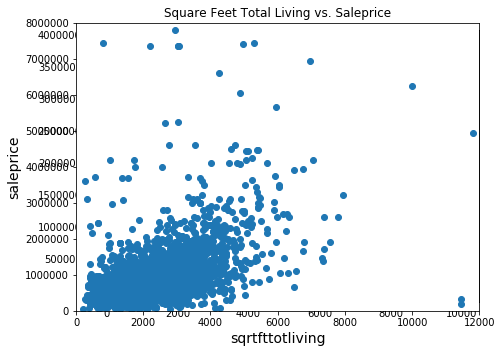

In [10]:
fig = plt.figure(figsize=(7, 5))
xlist = np.array(range(10000))
plt.plot(xlist, (model.params[0]+ xlist*model.params[1]), c='black')

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlim([0,12000])
axes.set_ylim([0,8000000])

plt.scatter(df['sqfttotliving'], df['saleprice'])
plt.title("Square Feet Total Living vs. Saleprice")

plt.xlabel('sqrtfttotliving', fontsize=14)
plt.ylabel('saleprice', fontsize=14)

plt.show()

Plot error histogram.

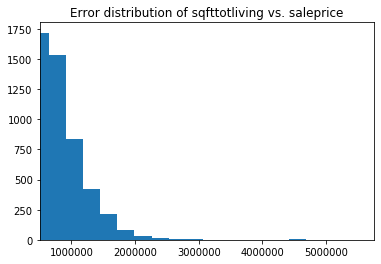

In [11]:
plt.title("Error distribution of sqfttotliving vs. saleprice")
plt.hist(model.fittedvalues, bins=20)
plt.xlim(500000)
plt.show()

## Does a porch increase sale price?

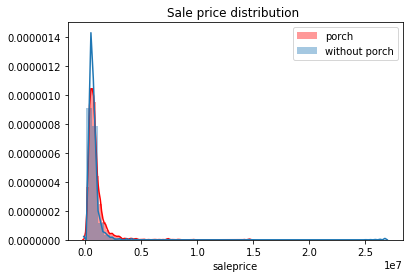

In [12]:
porch = df[df['porch']==1]['saleprice']
not_porch = df[df['porch']==0]['saleprice']
sns.distplot(porch, color ='r', label='porch')
sns.distplot(not_porch, label='without porch')
plt.title("Sale price distribution ")
plt.legend()
plt.savefig('visualization/porch.png', bbox_inches='tight');

## Does waterfront property increase sale price?

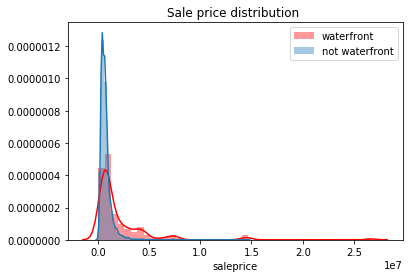

In [13]:
wtf = df[df['wfntlocation_isit']==1]['saleprice']
not_wtf = df[df['wfntlocation_isit']==0]['saleprice']
sns.distplot(wtf, color ='r', label='waterfront')
sns.distplot(not_wtf, label='not waterfront')
plt.title("Sale price distribution ")
plt.legend()
plt.savefig('visualization/waterfront.png', bbox_inches='tight');

## Adding more features to the model

In [14]:
feature_list = ['sqfttotliving','wfntfootage', 'trafficnoise','bathfullcount',
                'addnlcost','sewersystem','inadequateparking','age','porch',
                'wfntlocation_3','wfntlocation_6','wfntlocation_7','wfntlocation_8']
df_feature = df[feature_list]
df_feature_saleprice  = pd.concat([df_feature, df['saleprice']], axis=1)

X = df_feature
Y = df['saleprice']

predictors = sm.add_constant(X)

model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     265.5
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:31:37   Log-Likelihood:                -78018.
No. Observations:                5261   AIC:                         1.561e+05
Df Residuals:                    5247   BIC:                         1.562e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.708e+05   4.98e+04     -9.462      0.000   -5.68e+05   -3.73e+05
sqfttotliving       374.9207     11.270     33.268      0.000     352.827     397.014
wfntfootage        2986.0062    542.663      5.503      0.000    1922.161    4049.852
trafficnoise       1.756e+04   1.47e+04      1.194      0.233   -1.13e+04    4.64e+04
bathfullcount     -2.149e+04   1.62e+04     -1.324      0.186   -5.33e+04    1.03e+04
addnlcost            -3.0561      3.665     -0.834      0.404     -10.240       4.128
sewersystem         2.31e+05   2.14e+04     10.814      0.000    1.89e+05    2.73e+05
inadequateparking  2.375e+04   9478.805      2.506      0.012    5171.179    4.23e+04
age                1122.5276    329.606      3.406      0.001     476.363    1768.692
porch              3.618e+04   1.91e+04      1.891      0.059   -1328.356    7.37e+04
wfntlocation_3    -4.719e+04    1.1e+05     -0.428      0.669   -2.63e+05    1.69e+05
wfntlocation_6     3.454e+06   1.12e+05     30.914      0.000    3.24e+06    3.67e+06
wfntlocation_7     1.495e+06   2.06e+05      7.242      0.000    1.09e+06     1.9e+06
wfntlocation_8    -3.855e+05   1.35e+05     -2.851      0.004   -6.51e+05    -1.2e+05
==============================================================================
Omnibus:                     8882.401   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16032575.867
Skew:                          11.133   Prob(JB):                         0.00
Kurtosis:                     272.523   Cond. No.                     6.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

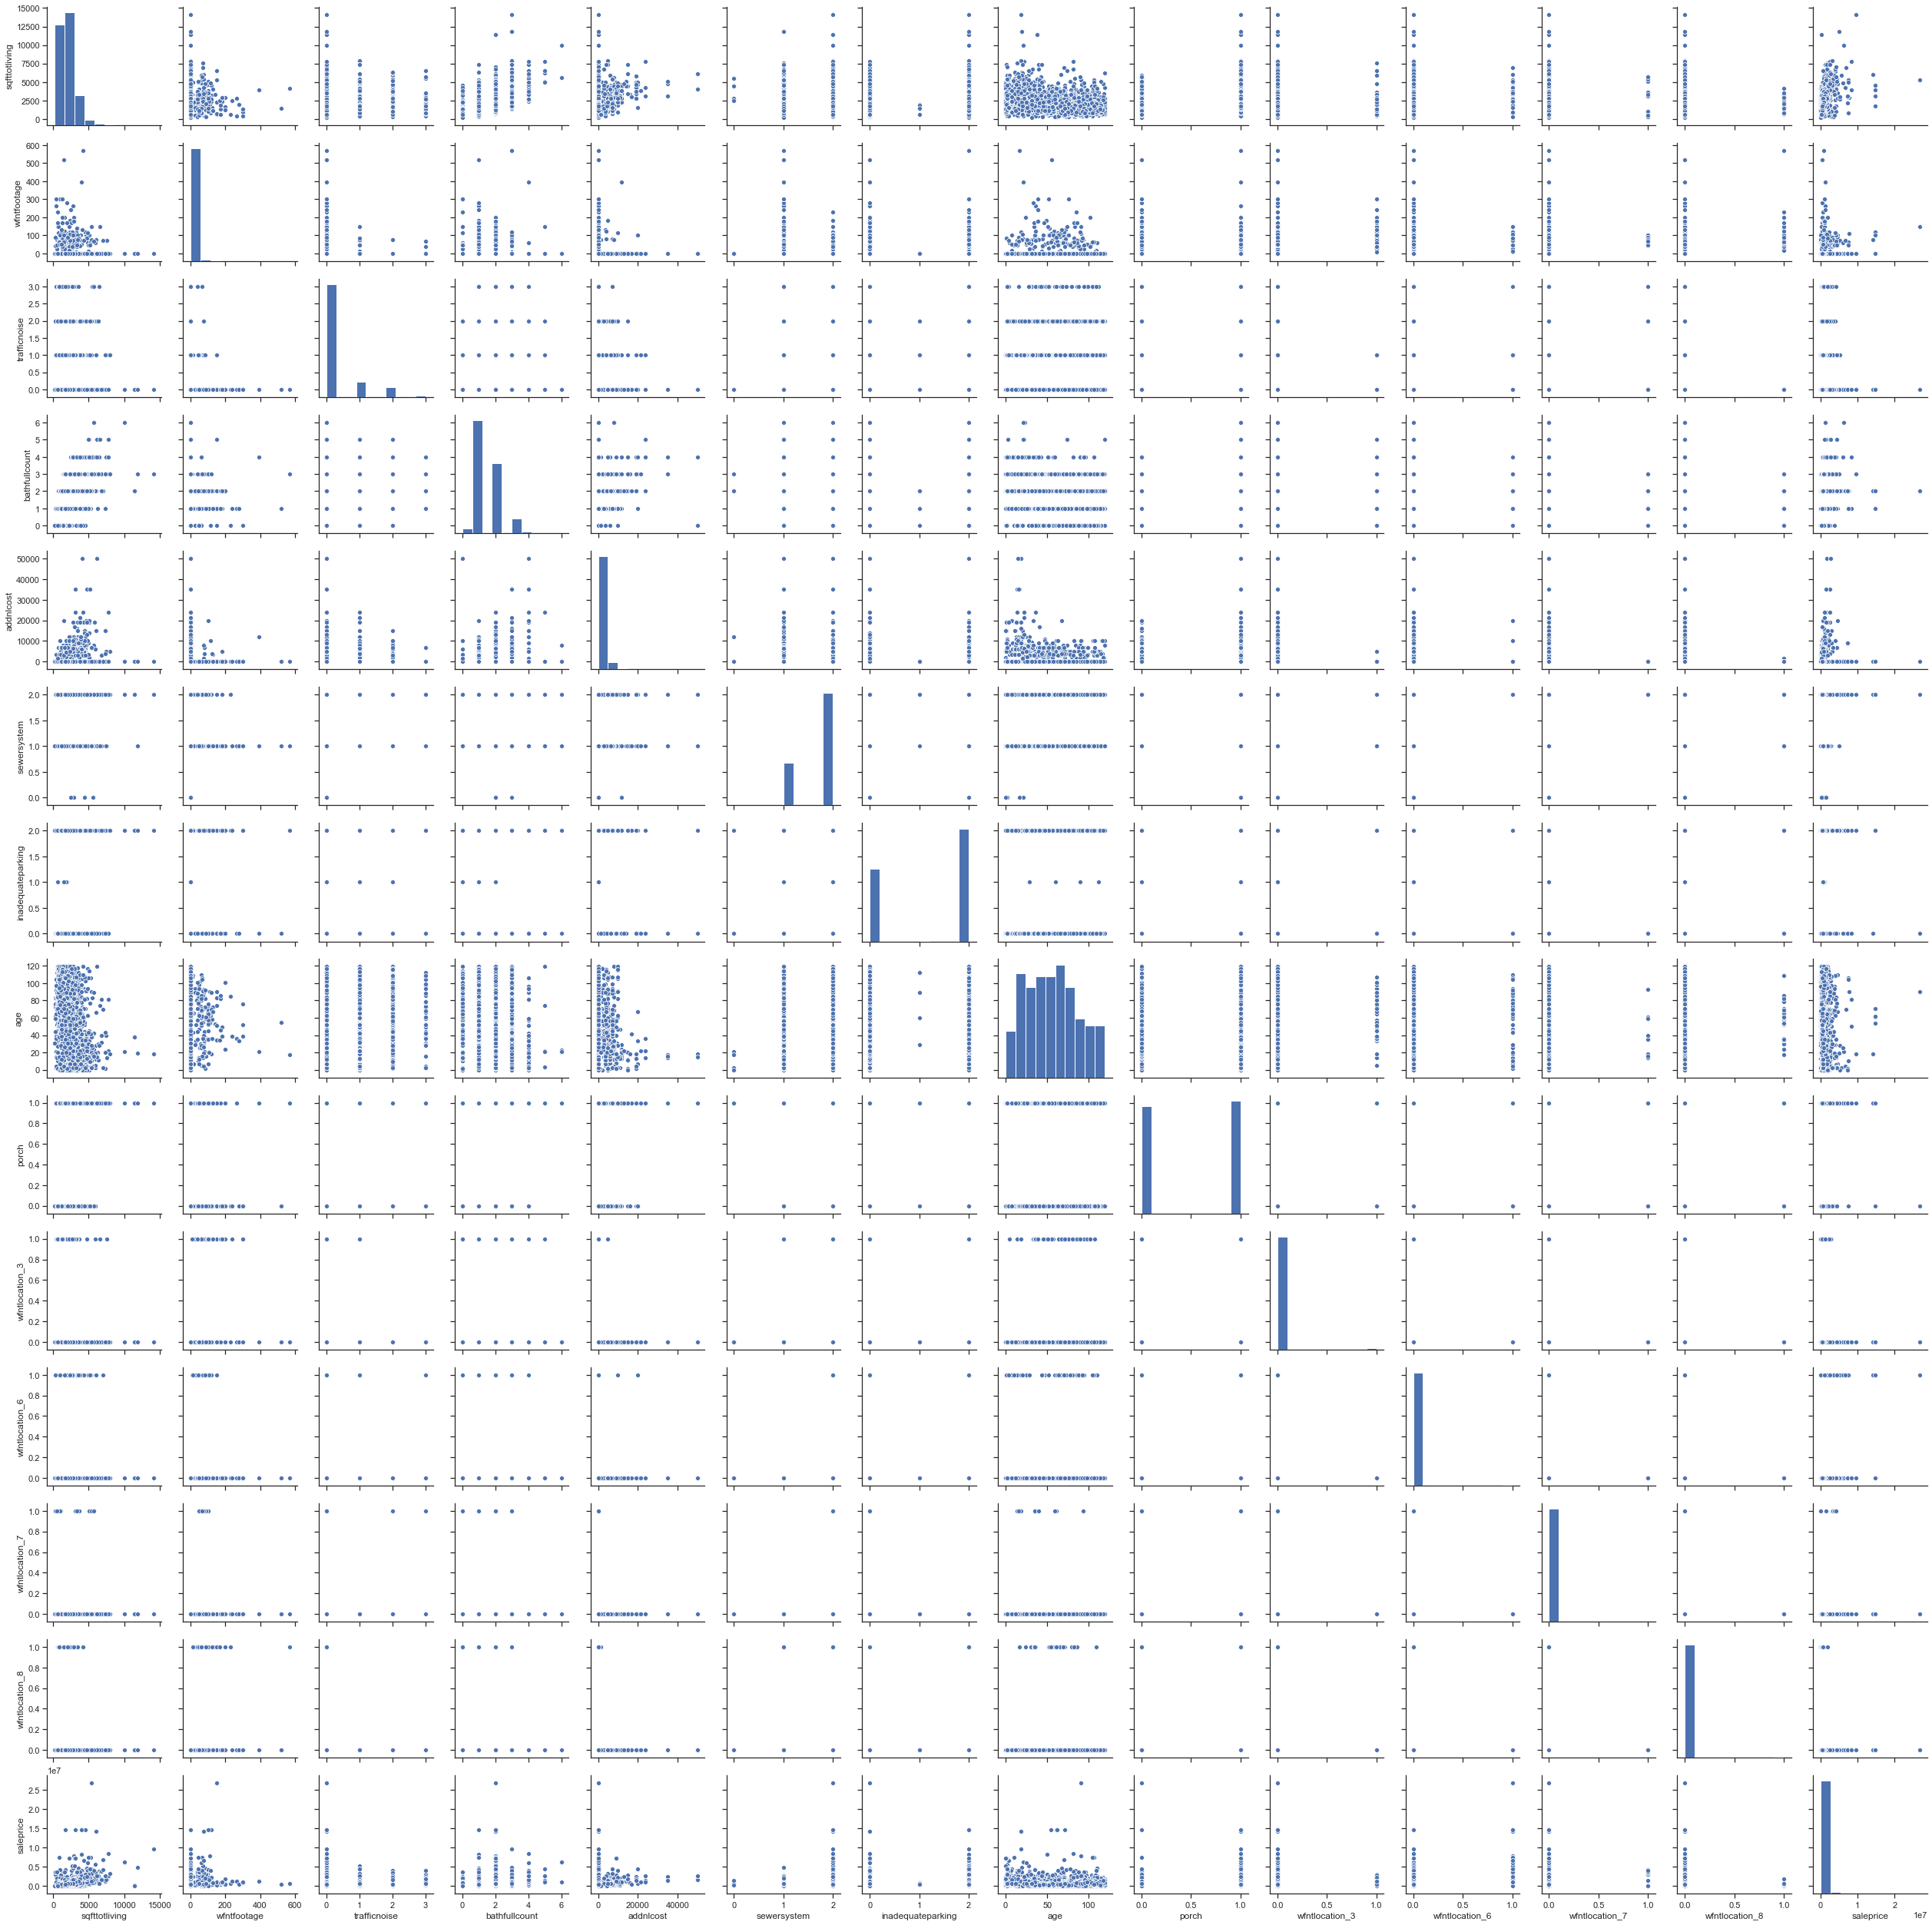

In [15]:
sns.set(style="ticks");
sns.pairplot(df_feature_saleprice);

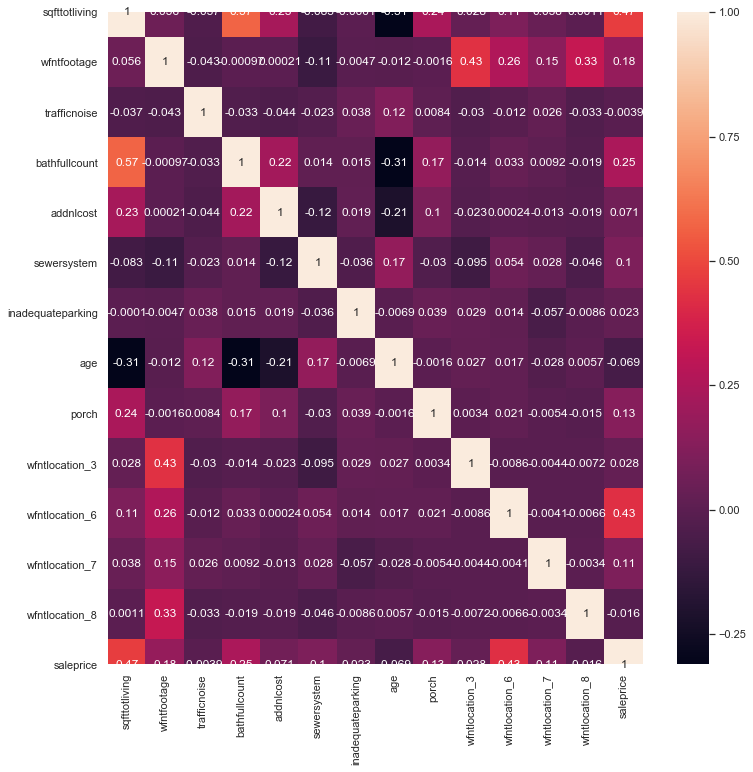

In [21]:
XY = pd.concat([X,Y],axis=1)
sns.heatmap(XY.corr(), annot=True);

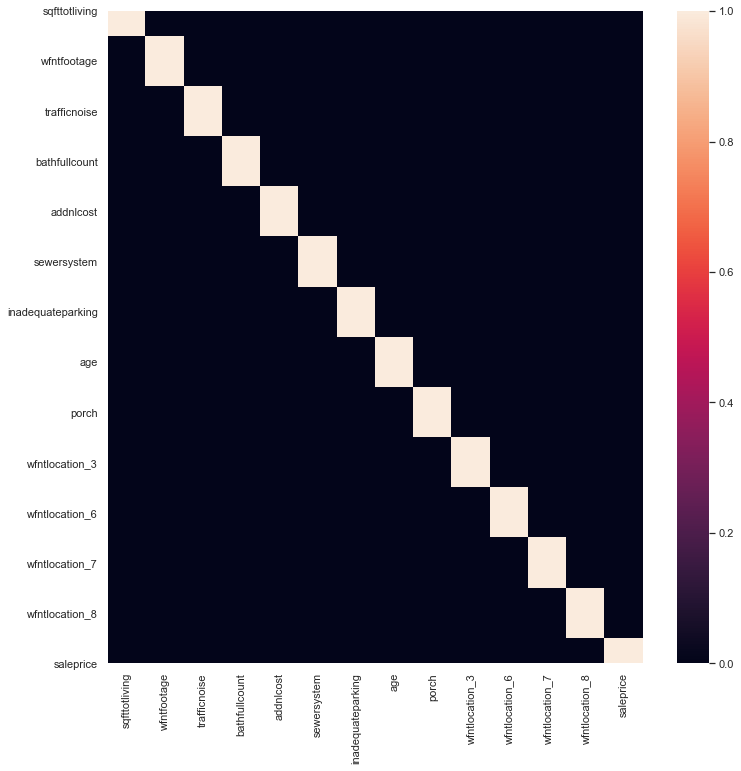

In [16]:
sns.set(rc={'figure.figsize':(12, 12)})
corr_high = abs(df_feature_saleprice.corr()) > .7
sns.heatmap(corr_high)

All our features are independent, none have a high correlation
In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

Found that building grade and square feet of living were highly correlated, so we removed building grade from our model

In [17]:
y_hat = model.fittedvalues
error = y_hat - Y
print("The minimun of error",error.min())
print("The maximun of error",error.max())

The minimun of error -20800421.803973135
The maximun of error 4458129.183624288


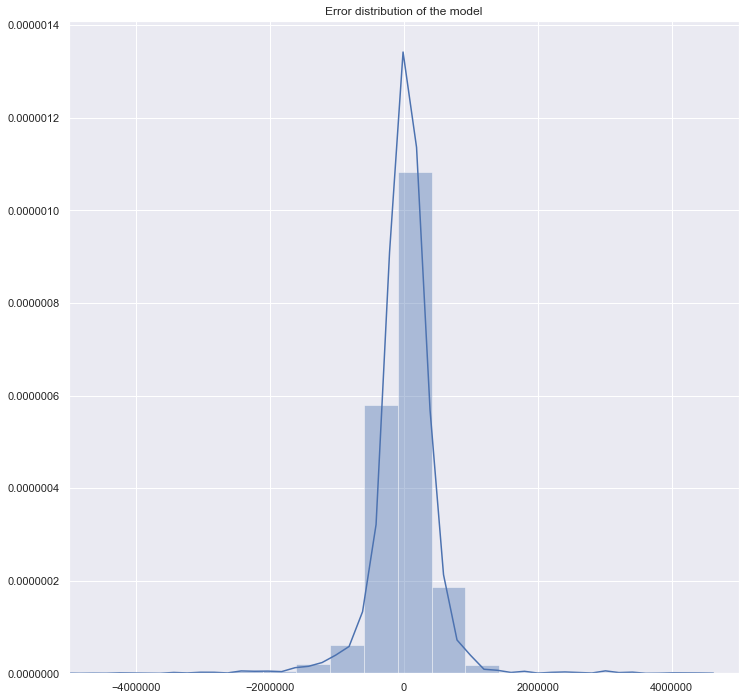

In [18]:
sns.distplot(error)
plt.title('Error distribution of the model')
plt.xlim(-.5e7,.5e7);

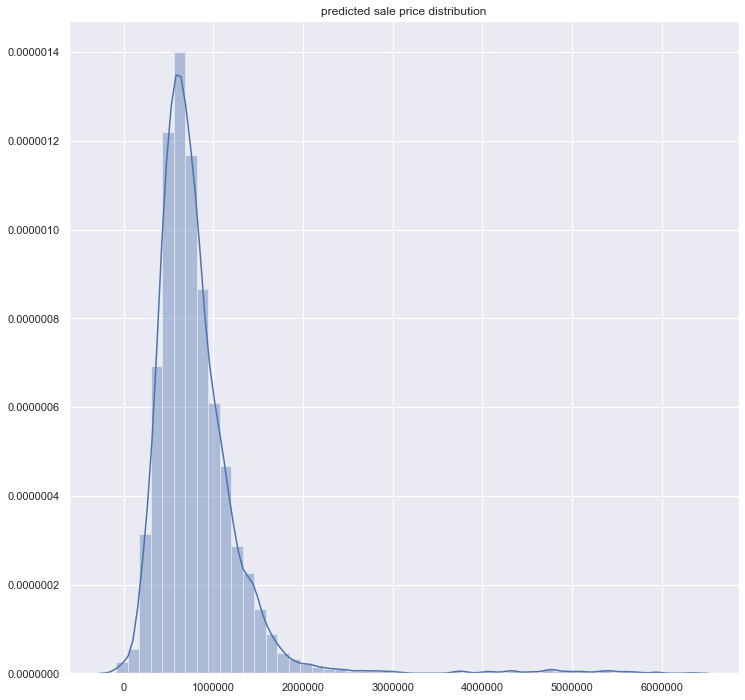

In [19]:
sns.distplot(y_hat)
plt.title('predicted sale price distribution');

## linear with respect to the outcome variable

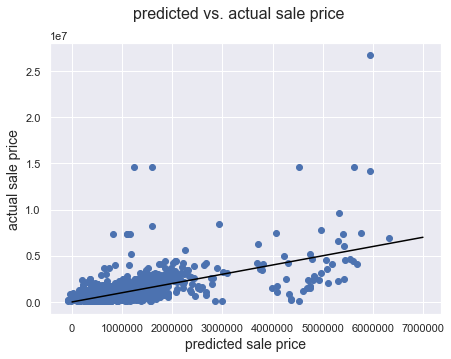

In [20]:
fig = plt.figure(figsize=(7, 5))
fig.suptitle('predicted vs. actual sale price', fontsize=16)

plt.scatter(y_hat, Y)
xlist = range(7000000)
plt.plot(xlist, xlist, c='black')
plt.xlabel('predicted sale price', fontsize=14)
plt.ylabel('actual sale price', fontsize=14)
plt.show()